## Supplementary Figure - Fast Charging
Siobhan Powell, 2021.

In [2]:
import os
os.chdir('..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [4]:
noev_scenario = pd.read_csv('Results/NoEVs_year2030_solar2.5x_wind2.5x_dpdf_20211119.csv')

In [5]:
scens1 = ['_TimersNone_noWPcontrol']
# scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome_FastCharging', 'HighHome_FastCharging', 'LowHome_HighWork_FastCharging', 'LowHome_LowWork_FastCharging']

vals1 = np.zeros((6, 5)) # emissions
vals2 = np.zeros((6, 5)) # peak mean weekday net demand

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/SupplementSensitivities/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/SupplementSensitivities/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                    
        inds = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0,1,2,3,4])].index
        vals2[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
        # assumes 5 miles / kWh
        vals1[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles


In [6]:
scens1 = ['_TimersNone_noWPcontrol']
# scens1 = ['_Timers9pm_noWPcontrol', '_Timers12am_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']

vals1_base = np.zeros((6, 5)) # emissions
vals2_base = np.zeros((6, 5)) # peak mean weekday net demand

for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        penlevel = 1.0
        try: 
            dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_dpdf_20211119.csv')
        except:
            try:
                dpdf = pd.read_csv('Results/Fuel1_Solar25_Wind25/fuel1_solar2.5_wind2.5_'+scen2+scen1+'_penlevel'+str(penlevel)+'_withstorage_dpdf_20211119.csv')
            except: 
                print('Error for ', penlevel, scen1, scen2)
                    
        inds = dpdf[pd.to_datetime(dpdf['datetime']).dt.weekday.isin([0,1,2,3,4])].index
        vals2_base[i, j] = dpdf.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()
        # assumes 5 miles / kWh
        vals1_base[i, j] = 0.2 * (dpdf.co2_tot.sum() - noev_scenario.co2_tot.sum()) / (dpdf.total_incl_noncombustion.sum() - noev_scenario.total_incl_noncombustion.sum()) # Emissions / total miles


In [7]:
refval2 = noev_scenario.loc[inds, 'demand'].values.reshape(-1,24).mean(axis=0).max()

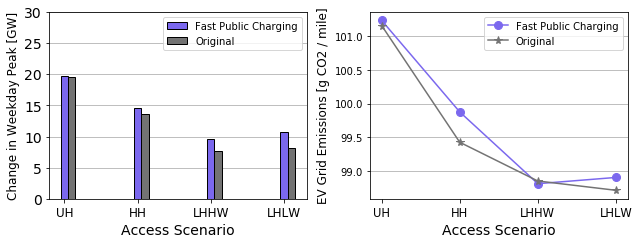

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(9,3.5))

axes = ax[0]
#     fig, axes = plt.subplots(1, 1, figsize=(9, 3.5))
titles=['UH', 'HH', 'LHHW', 'LHLW']
colors = ['#d7301f', '#fc8d59', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm SFH Timers', '12am SFH Timers', 'Uncontrolled', 'Min(Peak) Work Control', 'Min(Avg Em) Work Control']
hatches = ['//', '/', '', '.', 'o']

axes.set_xticks([0, 1, 2, 3])
axes.set_xticklabels(labels=titles, fontsize=12)#['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work'], fontsize=12)
axes.set_ylabel('Change in Weekday Peak [GW]', fontsize=12)
axes.set_xlabel('Access Scenario', fontsize=14)

axes.bar(np.array([0, 1, 2, 3]), (1/1000)*(vals2[0, np.arange(0, 4)]-refval2), 0.1, color='mediumslateblue', edgecolor='k', label='Fast Public Charging', hatch=hatches[2])
axes.bar(np.array([0, 1, 2, 3])+0.1, (1/1000)*(vals2_base[0, np.arange(0, 4)]-refval2), 0.1, color=colors[2], edgecolor='k', label='Original', hatch=hatches[2])

edgecolors=[None, None, 'k', None, None]
axes.legend()
axes.set_yticks(np.arange(0, 35, 5))
axes.set_yticklabels(np.arange(0, 35, 5), fontsize=14)
axes.set_axisbelow(True)        
axes.grid(axis='y')

ms = [8, 8, 14, 8, 8]
lines = ['-P', '-X', '-*', '-^','-v']

ax[1].plot(np.arange(0, 4), vals1[0, np.arange(0, 4)], '-o', color='mediumslateblue', ms=8, zorder=1, label='Fast Public Charging')
ax[1].plot(np.arange(0, 4), vals1_base[0, np.arange(0, 4)], '-*', color=colors[2], ms=8, zorder=1, label='Original')
ax[1].legend()
ax[1].set_ylabel('EV Grid Emissions [g CO2 / mile]', fontsize=12)
ax[1].set_axisbelow(True)        
ax[1].grid(axis='y')
ax[1].set_xticks(np.arange(0, 4))
ax[1].set_xticklabels(labels=titles, fontsize=11.5)
ax[1].set_xlabel('Access Scenario', fontsize=14)

plt.tight_layout()
plt.savefig('SupplementPlotting/Plots/supfig10_fast.pdf', bbox_inches='tight')
plt.show()
